# Multi-layer perceptron credit dataset

## Load the dataset

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('credit_data.csv')

In [3]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
dataset.shape

(2000, 5)

In [5]:
dataset.isna().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [6]:
dataset = dataset.dropna()
dataset.shape

(1997, 5)

In [7]:
inputs = dataset.iloc[:, 1:4].values

In [8]:
inputs

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [9]:
len(inputs)

1997

In [10]:
inputs.shape

(1997, 3)

In [11]:
inputs[0], inputs[1996]

(array([6.61559251e+04, 5.90170151e+01, 8.10653213e+03]),
 array([6.94365796e+04, 5.61526170e+01, 7.37883360e+03]))

In [12]:
max(inputs[0])

66155.9250950813

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = scaler.fit_transform(inputs)

In [15]:
max(inputs[0]), min(inputs[0])

(0.9574313540172937, 0.5888373913898217)

In [27]:
outputs = dataset.iloc[:, 4].values
outputs

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [28]:
len(outputs)

1997

In [29]:
outputs.shape

(1997,)

In [30]:
outputs = outputs.reshape(-1,1)
outputs.shape

(1997, 1)

## Complete neural network

In [43]:
import numpy as np

def sigmoid(sum):
  return 1 / (1 + np.exp(-sum))

def sigmoid_derivative(sigmoid):
  return sigmoid * (1 - sigmoid)

weights0 = 2 * np.random.random((3, 2)) - 1
weights1 = 2 * np.random.random((2,1)) - 1

In [44]:
weights0

array([[-0.51486474,  0.91032295],
       [-0.23192488,  0.437083  ],
       [-0.70810505, -0.75655254]])

In [45]:
weights1

array([[-0.82121918],
       [-0.28879722]])

In [46]:
epochs = 10000
learning_rate = 0.01

error = []

for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights0)
  hidden_layer = sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights1)
  output_layer = sigmoid(sum_synapse1)

  error_output_layer = outputs - output_layer
  mse = np.mean(np.square(error_output_layer))
  
  if epoch % 1000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(mse))
    error.append(mse)
  
  derivative_output = sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output
  
  weights1T = weights1.T
  delta_output_weight = delta_output.dot(weights1T)
  delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)
  
  hidden_layerT = hidden_layer.T
  input_x_delta1 = hidden_layerT.dot(delta_output)
  weights1 = weights1 + (input_x_delta1 * learning_rate)
  
  input_layerT = input_layer.T
  input_x_delta0 = input_layerT.dot(delta_hidden_layer)
  weights0 = weights0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 0.17927236979568797
Epoch: 1001 Error: 0.0742143039498802
Epoch: 2001 Error: 0.059310917608551596
Epoch: 3001 Error: 0.056976076482174474
Epoch: 4001 Error: 0.05565024941377294
Epoch: 5001 Error: 0.05472586127521567
Epoch: 6001 Error: 0.05402635257868091
Epoch: 7001 Error: 0.05346846551602393
Epoch: 8001 Error: 0.05300722492314155
Epoch: 9001 Error: 0.052615785522672244


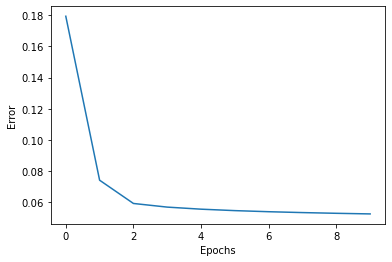

In [47]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(error)

In [48]:
def calculate_output(instance):
  hidden_layer = sigmoid(np.dot(instance, weights0))
  output_layer = sigmoid(np.dot(hidden_layer, weights1))
  return output_layer[0]

In [49]:
inputs[0], outputs[0]

(array([0.9231759 , 0.95743135, 0.58883739]), array([0], dtype=int64))

In [50]:
calculate_output(inputs[0])

0.041775445029301875

In [51]:
inputs[4], outputs[4]

(array([0.93911717, 0.61005687, 0.63704537]), array([1], dtype=int64))

In [52]:
calculate_output(inputs[4])

0.9057297142643937